# K-Means算法

### 提出契机
- 20世纪50年代，随着计算机技术的发展和数据量的增加，人们开始寻求一种能够自动对数据进行分类的方法，以发现数据中的潜在结构和规律。
- 1967年，James MacQueen首次提出了K-Means算法，旨在解决数据聚类问题，将相似的数据点划分到同一类中，使得类内的数据点尽可能相似，而类间的数据点尽可能不同。

### 理论基础
- **聚类分析**：是将物理或抽象对象的集合分组为由类似对象组成的多个类的过程。其目标是在数据中发现自然的分组结构，使得同一组内的数据对象具有较高的相似性，而不同组之间的数据对象具有较大的差异性。
- **距离度量**：在K-Means算法中，通常使用欧几里得距离来衡量数据点之间的相似性。欧几里得距离的计算公式为：$d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$，其中$x=(x_1,x_2,\cdots,x_n)$和$y=(y_1,y_2,\cdots,y_n)$是两个$n$维数据点。除欧几里得距离外，还可以根据具体问题选择其他距离度量方式，如曼哈顿距离、余弦相似度等。

### 算法流程
- **数据准备**：给定一个包含$m$个数据点的数据集$X=\{x_1,x_2,\cdots,x_m\}$，其中每个数据点$x_i$是一个$n$维向量。
- **初始化聚类中心**：随机选择$k$个数据点作为初始的聚类中心$\mu_1,\mu_2,\cdots,\mu_k$，或者使用其他初始化方法，如K-Means++等。
- **分配数据点到聚类**：对于数据集中的每个数据点$x_i$，计算其与$k$个聚类中心的距离，并将其分配到距离最近的聚类中心所对应的类中，即：$c_i = \arg\min_{j=1}^{k} d(x_i,\mu_j)$，其中$c_i$表示数据点$x_i$所属的类。
- **更新聚类中心**：对于每个聚类$j$，重新计算其聚类中心$\mu_j$，使其为该聚类中所有数据点的均值，即：$\mu_j=\frac{1}{|C_j|}\sum_{x_i\in C_j}x_i$，其中$|C_j|$表示聚类$j$中的数据点数量。
- **重复步骤3和4**：不断重复分配数据点和更新聚类中心的过程，直到聚类中心不再发生变化或达到预设的迭代次数。
- **输出聚类结果**：最终得到$k$个聚类$C_1,C_2,\cdots,C_k$以及对应的聚类中心$\mu_1,\mu_2,\cdots,\mu_k$。

### 核心公式
- **数据点与聚类中心的距离公式**：如上述欧几里得距离公式$d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$，用于确定数据点所属的聚类。
- **聚类中心更新公式**：$\mu_j=\frac{1}{|C_j|}\sum_{x_i\in C_j}x_i$，用于根据聚类内的数据点重新计算聚类中心。

### 算法优缺点
- **优点**：原理简单，易于理解和实现；计算复杂度相对较低，在处理大规模数据集时效率较高；对球形或近似球形的聚类效果较好；具有较好的可扩展性，可以方便地应用于分布式计算环境。
- **缺点**：需要事先指定聚类的数量$k$，而$k$的选择往往是困难的，不同的$k$值可能导致不同的聚类结果；对初始聚类中心的选择较为敏感，不同的初始值可能会收敛到不同的局部最优解；只能发现球形的聚类结构，对于非球形的数据分布效果不佳；对噪声和孤立点比较敏感，少量的噪声点可能会对聚类结果产生较大的影响。

## 具体样例
以下是一个使用K-Means算法进行聚类的完整计算样例，假设有一个二维数据集，我们通过手动计算的方式来展示算法流程：

### 1. 数据集准备
假设有如下包含6个二维数据点的数据集 $X$：

| 数据点编号 | 坐标（$x$值，$y$值） |
|:-----------:|:-------------------:|
| 1           | (1, 1)              |
| 2           | (1.5, 2)            |
| 3           | (3, 4)              |
| 4           | (5, 7)              |
| 5           | (3.5, 5)            |
| 6           | (4, 5)              |

我们设定聚类的数量 $k = 2$。

### 2. 初始化聚类中心
随机选择两个数据点作为初始聚类中心，这里我们选择数据点1（坐标为(1, 1) ）作为第一个聚类中心 $\mu_1$，数据点4（坐标为(5, 7) ）作为第二个聚类中心 $\mu_2$。

### 3. 分配数据点到聚类（第一轮迭代）
使用欧几里得距离公式$d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$（这里 $n = 2$，对应二维坐标的两个维度）来计算每个数据点到两个聚类中心的距离，并将其分配到距离最近的聚类中心对应的类中。

- 对于数据点1（坐标为(1, 1) ）：
  - 到 $\mu_1=(1, 1)$ 的距离 $d_1 = \sqrt{(1 - 1)^2 + (1 - 1)^2} = 0$
  - 到 $\mu_2=(5, 7)$ 的距离 $d_2 = \sqrt{(1 - 5)^2 + (1 - 7)^2}=\sqrt{16 + 36}=\sqrt{52} \approx 7.21$
  因为 $d_1 < d_2$，所以数据点1分配到聚类1中。

- 对于数据点2（坐标为(1.5, 2) ）：
  - 到 $\mu_1=(1, 1)$ 的距离 $d_1 = \sqrt{(1.5 - 1)^2 + (2 - 1)^2}=\sqrt{0.25 + 1}=\sqrt{1.25} \approx 1.12$
  - 到 $\mu_2=(5, 7)$ 的距离 $d_2 = \sqrt{(1.5 - 5)^2 + (2 - 7)^2}=\sqrt{12.25 + 25}=\sqrt{37.25} \approx 6.10$
  因为 $d_1 < d_2$，所以数据点2分配到聚类1中。

- 对于数据点3（坐标为(3, 4) ）：
  - 到 $\mu_1=(1, 1)$ 的距离 $d_1 = \sqrt{(3 - 1)^2 + (4 - 1)^2}=\sqrt{4 + 9}=\sqrt{13} \approx 3.61$
  - 到 $\mu_2=(5, 7)$ 的距离 $d_2 = \sqrt{(3 - 5)^2 + (4 - 7)^2}=\sqrt{4 + 9}=\sqrt{13} \approx 3.61$
  这里我们按照规则（比如优先分配到索引小的聚类中心对应的类等，需提前确定好规则），将数据点3分配到聚类1中。

- 对于数据点4（坐标为(5, 7) ）：
  - 到 $\mu_1=(1, 1)$ 的距离 $d_1 = \sqrt{(5 - 1)^2 + (7 - 1)^2}=\sqrt{16 + 36}=\sqrt{52} \approx 7.21$
  - 到 $\mu_2=(5, 7)$ 的距离 $d_2 = \sqrt{(5 - 5)^2 + (7 - 7)^2} = 0$
  所以数据点4分配到聚类2中。

- 对于数据点5（坐标为(3.5, 5) ）：
  - 到 $\mu_1=(1, 1)$ 的距离 $d_1 = \sqrt{(3.5 - 1)^2 + (5 - 1)^2}=\sqrt{6.25 + 16}=\sqrt{22.25} \approx 4.72$
  - 到 $\mu_2=(5, 7)$ 的距离 $d_2 = \sqrt{(3.5 - 5)^2 + (5 - 7)^2}=\sqrt{2.25 + 4}=\sqrt{6.25} \approx 2.50$
  所以数据点5分配到聚类2中。

- 对于数据点6（坐标为(4, 5) ）：
  - 到 $\mu_1=(1, 1)$ 的距离 $d_1 = \sqrt{(4 - 1)^2 + (5 - 1)^2}=\sqrt{9 + 16}=\sqrt{25} = 5$
  - 到 $\mu_2=(5, 7)$ 的距离 $d_2 = \sqrt{(4 - 5)^2 + (5 - 7)^2}=\sqrt{1 + 4}=\sqrt{5} \approx 2.24$
  所以数据点6分配到聚类2中。

第一轮迭代后，聚类1包含数据点1、2、3，聚类2包含数据点4、5、6。

### 4. 更新聚类中心（第一轮迭代后）
- 对于聚类1：
  数据点为 (1, 1)、(1.5, 2)、(3, 4)，新的聚类中心 $\mu_1$ 的坐标计算如下：
  $x$坐标：$(1 + 1.5 + 3) / 3 = 1.83$（保留两位小数）
  $y$坐标：$(1 + 2 + 4) / 3 = 2.33$（保留两位小数）
  所以更新后的 $\mu_1=(1.83, 2.33)$。

- 对于聚类2：
  数据点为 (5, 7)、(3.5, 5)、(4, 5)，新的聚类中心 $\mu_2$ 的坐标计算如下：
  $x$坐标：$(5 + 3.5 + 4) / 3 = 4.17$（保留两位小数）
  $y$坐标：$(7 + 5 + 5) / 3 = 5.67$（保留两位小数）
  所以更新后的 $\mu_2=(4.17, 5.67)$。

### 5. 分配数据点到聚类（第二轮迭代）
再次计算每个数据点到更新后的两个聚类中心的距离，并重新分配。

- 对于数据点1（坐标为(1, 1) ）：
  - 到 $\mu_1=(1.83, 2.33)$ 的距离 $d_1 = \sqrt{(1 - 1.83)^2 + (1 - 2.33)^2}=\sqrt{0.6889 + 1.7689}=\sqrt{2.4578} \approx 1.57$
  - 到 $\mu_2=(4.17, 5.67)$ 的距离 $d_2 = \sqrt{(1 - 4.17)^2 + (1 - 5.67)^2}=\sqrt{9.9889 + 21.8089}=\sqrt{31.7978} \approx 5.64$
  因为 $d_1 < d_2$，所以数据点1仍分配到聚类1中。

（依次类似地计算其他数据点到新聚类中心的距离并分配，过程略）

经过第二轮迭代后，发现数据点的分配情况和第一轮迭代后没有变化（实际情况中可能还需要继续迭代，直到聚类中心不再变化或者达到设定的最大迭代次数）。

### 6. 最终聚类结果
最终得到两个聚类：
- 聚类1包含数据点1、2、3，聚类中心为(1.83, 2.33)。
- 聚类2包含数据点4、5、6，聚类中心为(4.17, 5.67)。

这样就通过K-Means算法完成了对给定数据集的聚类操作，将数据点划分为了两个不同的类别。在实际应用中，数据集往往规模更大，维度更多，通常会借助编程工具（如Python的`sklearn`库等）来高效地实现K-Means算法的计算过程。 




# 代码实现（基础版本）

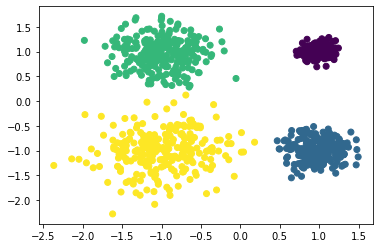

In [34]:
import random
import math
import matplotlib.pyplot as plt

# 生成指定聚类中心、标准差和样本数量的聚类数据
def make_blobs_like(n_samples, centers, cluster_std):
    data = []
    labels = []
    if isinstance(cluster_std, int):
        cluster_std = [cluster_std for _ in range(len(centers))]
    for i in range(len(centers)):
        center = centers[i]
        for _ in range(n_samples // len(centers)):
            # 按照正态分布在聚类中心周围生成点（这里简单模拟二维情况）
            x = random.gauss(center[0], cluster_std[i])
            y = random.gauss(center[1], cluster_std[i])
            data.append([x, y])
            labels.append(i)
    return data, labels


# 示例用法
# 定义聚类中心，这里假设有4个聚类中心，每个中心是二维坐标
centers=[[1,1], [1,-1], [-1,1], [-1,-1]]
n_samples = 1000  # 总样本数量
cluster_std=[0.1, 0.2, 0.3, 0.4]  # 聚类的标准差

data, labels = make_blobs_like(n_samples, centers, cluster_std)
x1 = [x[0] for x in data]
x2 = [x[1] for x in data]
plt.scatter(x1, x2, marker='o', c=labels)
# # 简单打印生成的数据和对应的标签（这里只是查看，实际应用中可以进一步处理）
# for d, l in zip(data, labels):
#     print(f"数据点: {d}, 所属聚类标签: {l}")

In [41]:
import numpy as np


def euclidean_distance(point1, point2):
    """
    计算两个点之间的欧几里得距离
    :param point1: 第一个点，是一个 numpy 数组
    :param point2: 第二个点，是一个 numpy 数组
    :return: 两点之间的欧几里得距离
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))


def kmeans(X, k, max_iters=100):
    """
    K-Means 算法的实现函数
    :param X: 输入的数据，是一个 numpy 数组，形状为 (n_samples, n_features)
    :param k: 聚类的数量
    :param max_iters: 最大迭代次数
    :return: 聚类中心和样本的聚类分配结果
    """
    # 随机初始化 k 个聚类中心
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        # 存储每个样本所属的聚类
        clusters = [[] for _ in range(k)]
        # 分配样本到最近的聚类中心
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        # 存储旧的聚类中心
        old_centroids = centroids.copy()
        # 更新聚类中心
        for i in range(k):
            if len(clusters[i]) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)
        # 如果聚类中心不再变化，结束迭代
        if np.all(old_centroids == centroids):
            break
    # 将聚类结果转换为 numpy 数组
    cluster_assignments = np.zeros(X.shape[0], dtype=int)
    for i, cluster in enumerate(clusters):
        for point in cluster:
            index = np.where((X == point).all(axis=1))[0][0]
            cluster_assignments[index] = i
    return centroids, cluster_assignments


# 测试代码
if __name__ == "__main__":
    # 示例数据集，形状为 (n_samples, n_features)
    X = np.array(data)
    k = 3
    centroids, cluster_assignments = kmeans(X, k, max_iters=100)

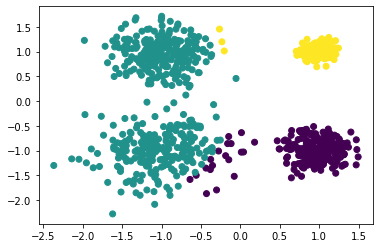

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments)
plt.show()

In [74]:
import numpy as np


def euclidean_distance(point1, point2):
    """
    计算两个点之间的欧几里得距离
    :param point1: 第一个点，是一个 numpy 数组
    :param point2: 第二个点，是一个 numpy 数组
    :return: 两点之间的欧几里得距离
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))


def update_centroids(centroids, clusters):
    """
    更新聚类中心
    :param centroids: 聚类中心，是一个 numpy 数组
    :param clusters: 存储每个簇的样本点的列表
    :return: 更新后的聚类中心
    """
    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            new_centroids.append(np.mean(cluster, axis=0))
        else:
            new_centroids.append(centroids[len(new_centroids)])
    return np.array(new_centroids)


def minibatch_kmeans(X, k, batch_size=100, max_iters=100):
    """
    MiniBatchKMeans 算法的实现函数
    :param X: 输入的数据，是一个 numpy 数组，形状为 (n_samples, n_features)
    :param k: 聚类的数量
    :param batch_size: 小批量样本的大小
    :param max_iters: 最大迭代次数
    :return: 聚类中心和样本的聚类分配结果
    """
    # 随机初始化 k 个聚类中心
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        # 随机抽取一个小批量样本
        batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
        batch = X[batch_indices]
        # 存储每个样本所属的聚类
        clusters = [[] for _ in range(k)]
        # 分配样本到最近的聚类中心
        for point in batch:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        # 更新聚类中心
        centroids = update_centroids(centroids, clusters)
    # 存储最终的聚类分配结果
    cluster_assignments = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        cluster_assignments.append(cluster_index)
    return centroids, np.array(cluster_assignments)


# 测试代码
if __name__ == "__main__":
    # 示例数据集，形状为 (n_samples, n_features)
    X = np.array(X)
    k = 2
    batch_size = 10
    centroids, cluster_assignments = minibatch_kmeans(X, k, batch_size, max_iters=100)

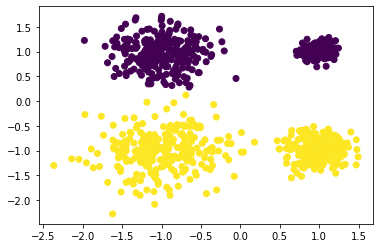

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments)
plt.show()